# Intro to causal forest

This notebook aims to explain how causal forest works and some key differences compared to other well-known tree-based algorithms.

I will also try to apply it to a toy dataset using the implementation of causal forest from EconML. 

## Data generation

I will introduce some synthetic data by following a data generation process that is also presented in a [demo notebook](https://github.com/py-why/EconML/blob/main/notebooks/Metalearners%20Examples.ipynb) in EconML

### Process

- $x_i = normal(mean=0, std=1)$
- $Y\_x_i = x_i * uniform(low=-3, high=3) + normal(mean=0, std=1)$
- $TE = 
  \begin{cases}
    8, & \text{if } x_1 > 0.1 \\
    0, & \text{else}
  \end{cases}$
- $propensity = \begin{cases}
    0.8, & \text{if } -0.5 < x_2 <0.5 \\
    0.2, & \text{else}
   \end{cases}$
- $T = binomaial(prop=propensity, trials=1)$
- $Y = TE * T + Y\_x_i$

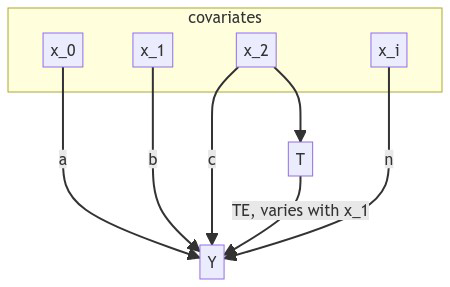

In [1]:
from IPython.display import Image
Image('diagrams/causal_forest/causal_forest.md.1.png')

## Causal forest

Causal forest can estimate heterogeneous treatment effects. It is composed of causal trees, each of which is very similar to the decision tree that we are all familiar with. However, there are several subtle differences, including splitting criteria, evaluation methods, etc. But why can't we use a decision tree to solve uplift modeling problems? The key issue for the decision tree is that it is not designed to estimate treatment effects, and it would introduce generalization bias. Besides, the ground truth is never observed, making it challenging to directly use a decision tree to estimate treatment effects.

### How it works?
Causal forest is a method from generalised random forest. The split criterion of a causal tree is to maximise the average treatment effects between the treated samples and control samples within a leave.

### Learning materials
- [Causal Forest by Susan Athey](https://www.youtube.com/watch?v=oZoizsX3bts&list=PLoazKTcS0RzZ1SUgeOgc6SWt51gfT80N0&index=7)
- [Causa forest intuition](https://www.statworx.com/en/content-hub/blog/machine-learning-goes-causal-ii-meet-the-random-forests-causal-brother/)
- [Causal tree tutorial page 9](https://drive.google.com/drive/u/0/folders/1_h0gepokalfe-dXzoSsS7scc9EE3-DTl)